# アルピコホールディングス ５分足

In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import re
import yfinance as yf

pattern = re.compile(r'(.+)\.T')

symbol = '297A.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='1d', interval='5m')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-12-30 09:05:00+09:00,345.0,350.0,328.0,332.0,643200,0.0,0.0
2024-12-30 09:10:00+09:00,332.0,350.0,314.0,325.0,2585800,0.0,0.0
2024-12-30 09:15:00+09:00,325.0,326.0,291.0,311.0,3040300,0.0,0.0
2024-12-30 09:20:00+09:00,312.0,324.0,311.0,317.0,1295300,0.0,0.0
2024-12-30 09:25:00+09:00,317.0,318.0,296.0,304.0,1596200,0.0,0.0
2024-12-30 09:30:00+09:00,303.0,306.0,297.0,303.0,518300,0.0,0.0
2024-12-30 09:35:00+09:00,304.0,305.0,298.0,303.0,560600,0.0,0.0
2024-12-30 09:40:00+09:00,303.0,314.0,300.0,307.0,939500,0.0,0.0
2024-12-30 09:45:00+09:00,307.0,314.0,294.0,302.0,1547900,0.0,0.0


## ローソク足チャート

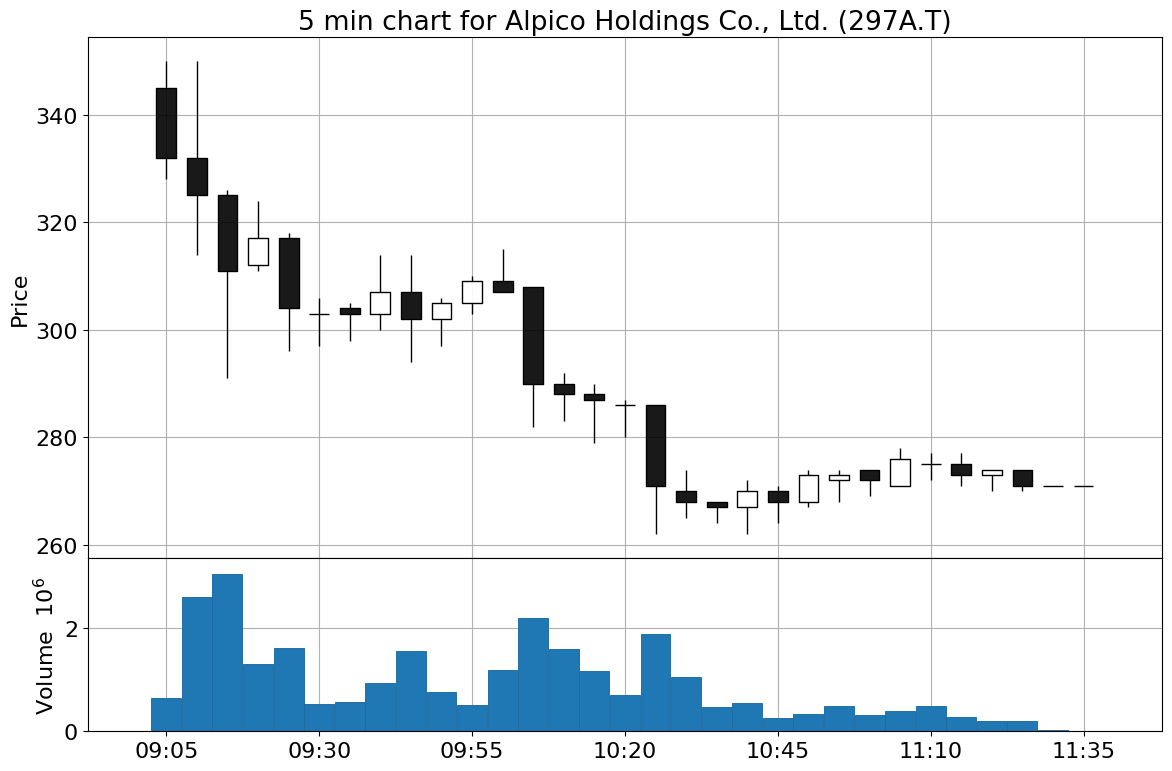

In [2]:
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 8))

gs = fig.add_gridspec(
    2, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3, 1]
)

ax = dict()
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis

mpf.plot(
    df,
    type='candle',
    style='default',
    datetime_format='%H:%M',
    xrotation=0,
    ax=ax[0],
    volume=ax[1],
)

try:
    ax[0].set_title('5 min chart for %s (%s)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('5 min chart for %s' % symbol)

ax[0].grid()
ax[1].grid()

plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('5min_chart_%s.png' % m.group(1))
else:
    plt.savefig('5min_chart_%s.png' % symbol)

plt.show()

In [3]:
df.tail(2)['Close']

Datetime
2024-12-30 11:30:00+09:00    271.0
2024-12-30 11:35:00+09:00    271.0
Name: Close, dtype: float64

In [4]:
df.tail(2)['Close'].diff()

Datetime
2024-12-30 11:30:00+09:00    NaN
2024-12-30 11:35:00+09:00    0.0
Name: Close, dtype: float64